In [9]:
from pathlib import Path

from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import Preprocess, OptimalExecutionEnvironment

PATH = Path().cwd()

In [10]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=9)
data = raw.process()

In [11]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [12]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0

env = OptimalExecutionEnvironment(
    data,
    steps=TWENTY_SECOND_DAY,
    max_position=1,
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2000,
    seed=SEED,
)
trainer.train()

TypeError: Can't instantiate abstract class OptimalExecutionEnvironment with abstract methods _generate_readable_action_space, _reset_history, _update_history

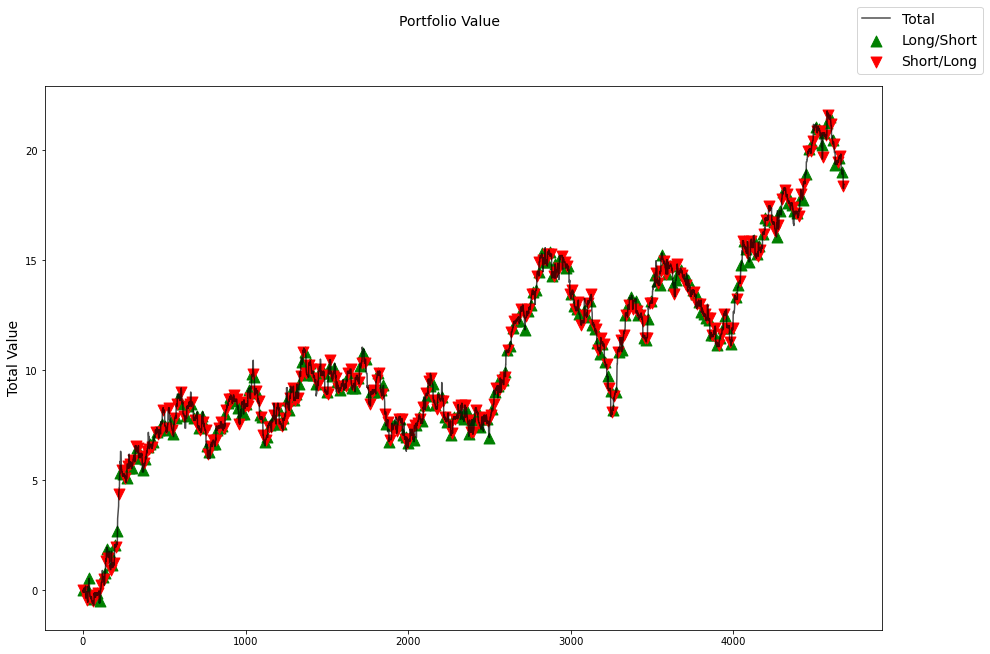

In [6]:
env.plot()

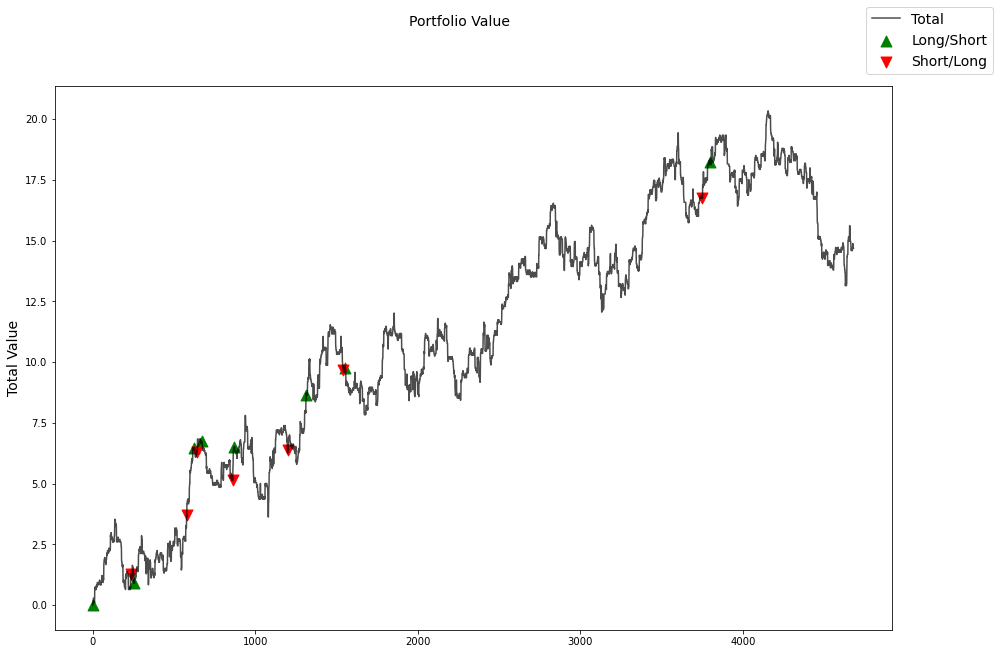

In [7]:
env_test.plot()

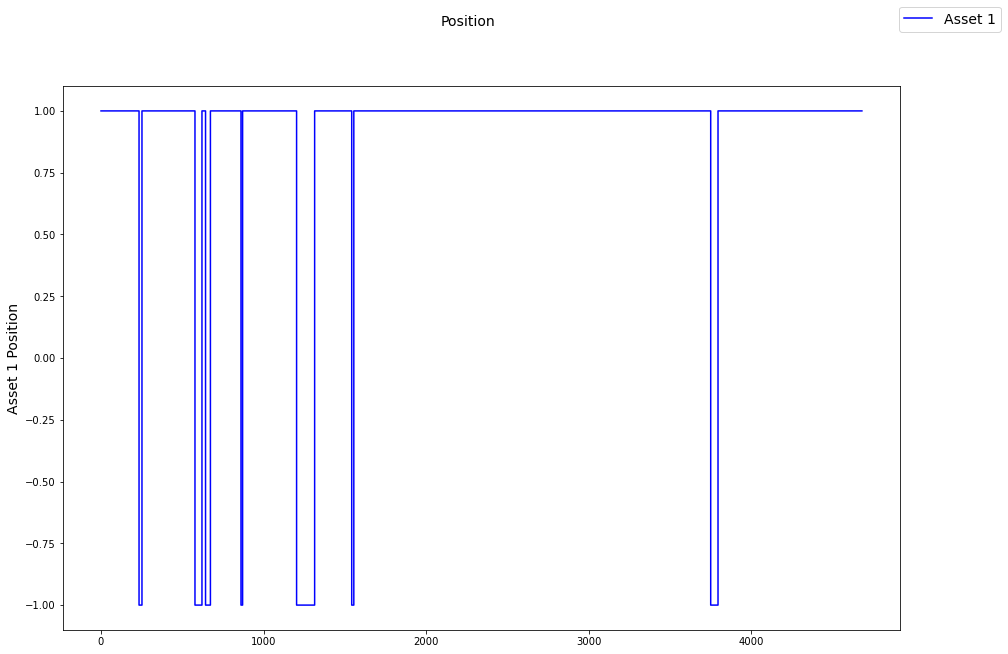

In [8]:
env_test.plot('position_history')

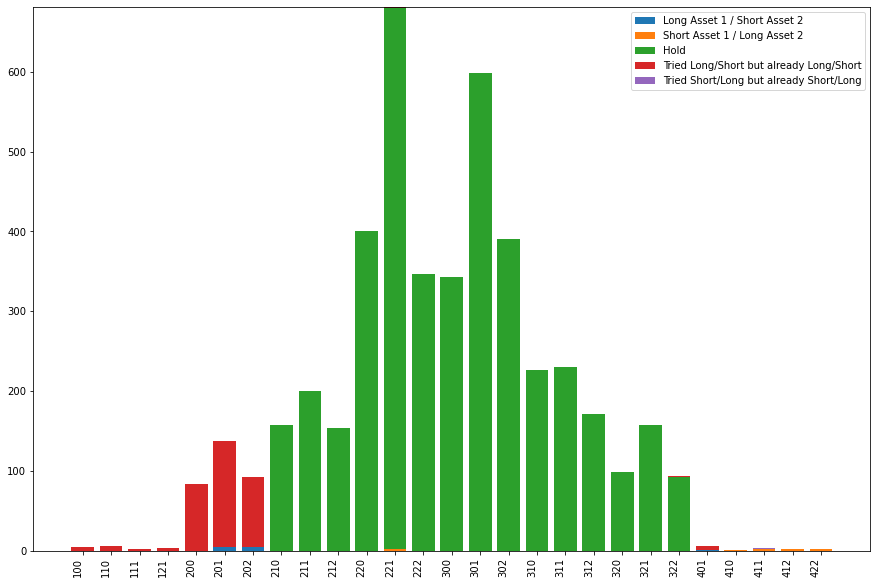

In [9]:
env_test.plot('summarize_decisions')

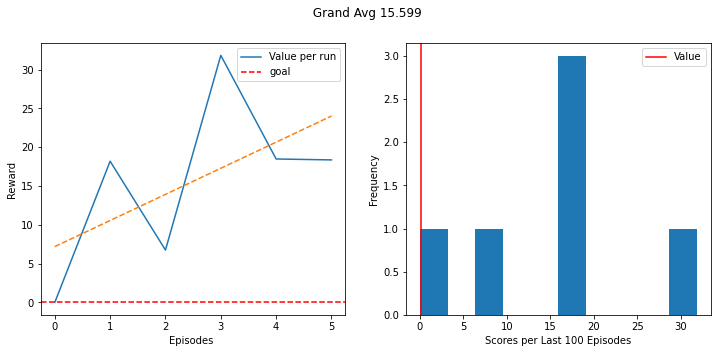

In [11]:
env.plot('learning_progress')